In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS-SB/Story_telling/adult.csv')

In [4]:
df.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
print(f'This data set contains of {df.shape[0]} rows and {df.shape[1]} columns')

This data set contains of 48842 rows and 15 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Types of the attributes:**


Categorical Attributes:
workclass (Individual work category).
education (The highest education degree for the person).
marital-status: (Individual marital status).
occupation: (Individual's occupation) .
relationship: (Individual's relation in a family).
race: (Race of Individual).
sex: Female, Male.
native-country: (Individual's native country).
Continuous Attributes:
age: (Age of an individual).
education-num: (Individual's year of receiving education).
fnlwgt: final weight.
capital-gain.
capital-loss.
hours-per-week: (Individual's working hour per week).


In [8]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [9]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [10]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0.5, 1.0, 'Income less than 50,000')

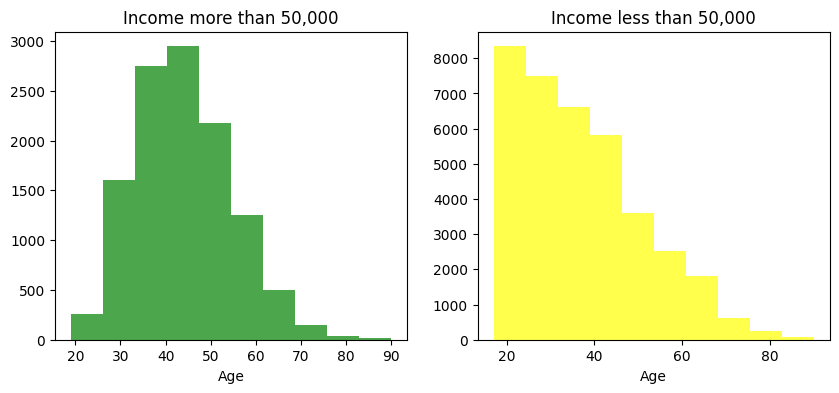

In [11]:
figure, axis = plt.subplots(1, 2, figsize=(10,4))

axis[0].hist(df[df['income'] == '>50K']['age'], bins=10,color='green', alpha=0.7)
axis[0].set_xlabel('Age')
axis[0].set_title('Income more than 50,000')

axis[1].hist(df[df['income'] == '<=50K']['age'], bins=10,color='yellow', alpha=0.7)
axis[1].set_xlabel('Age')
axis[1].set_title('Income less than 50,000')

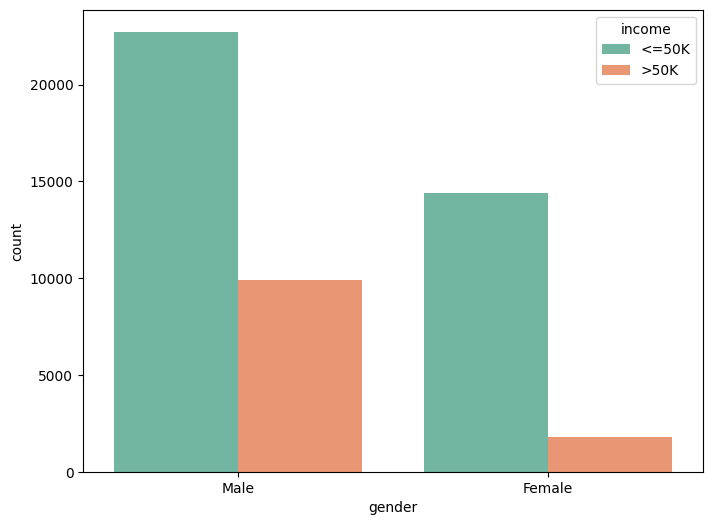

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=df, palette='Set2');

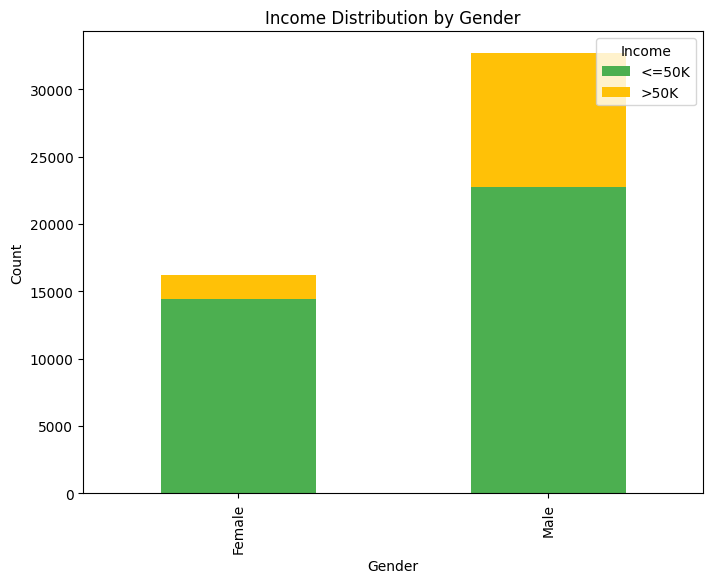

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with counts of each combination of 'gender' and 'income'
cross_tab = pd.crosstab(df['gender'], df['income'])

# Plotting a stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#4CAF50', '#FFC107'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', loc='upper right')

# Show the plot
plt.show()


<ipython-input-14-bdf66be6a2d7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20)


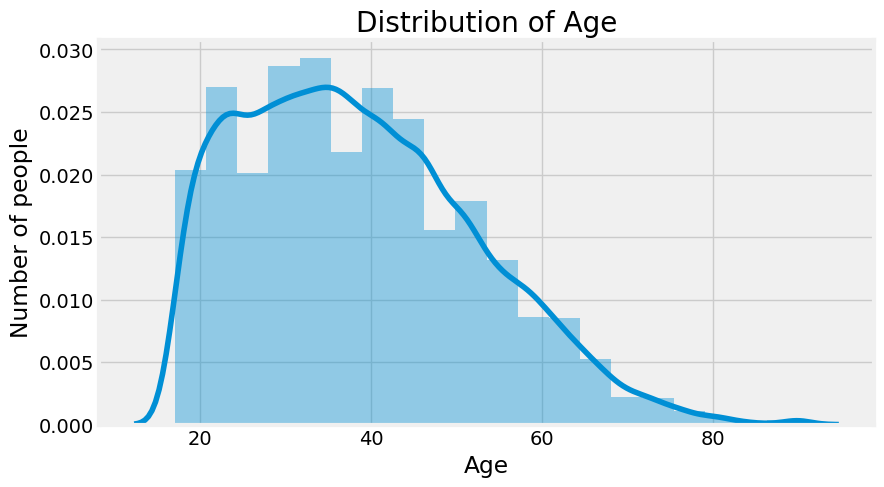

In [14]:
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

<ipython-input-15-86f390d0a909>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-15-86f390d0a909>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_num.index, y=edu_num.values, palette='husl')


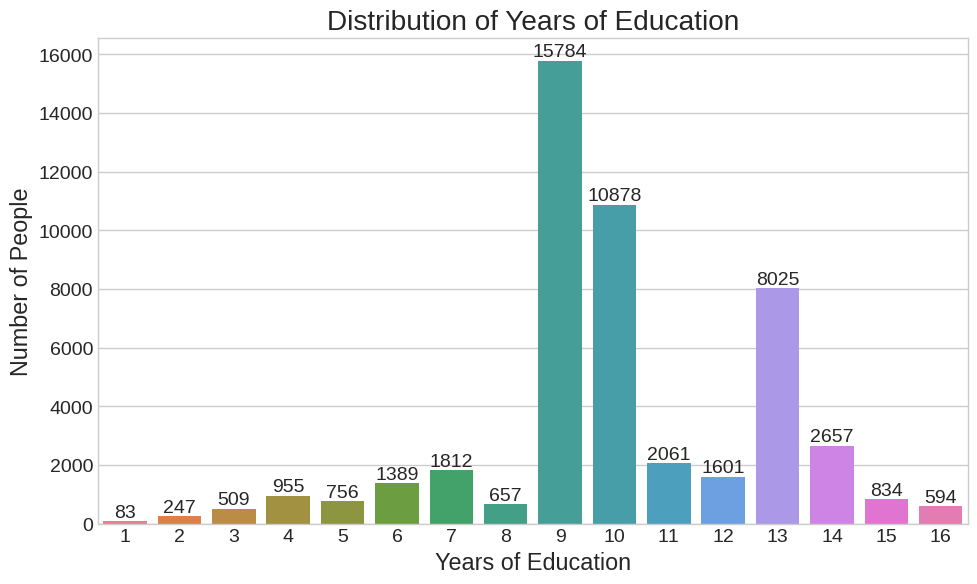

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate the counts of each unique value in 'educational-num'
edu_num = df['educational-num'].value_counts().sort_index()

# Set a professional style
plt.style.use('seaborn-whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='husl')

# Adding labels and title
plt.xlabel('Years of Education')
plt.ylabel('Number of People')
plt.title('Distribution of Years of Education')

# Adding value annotations on each bar
for index, value in enumerate(edu_num.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


<ipython-input-16-364e64779b59>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


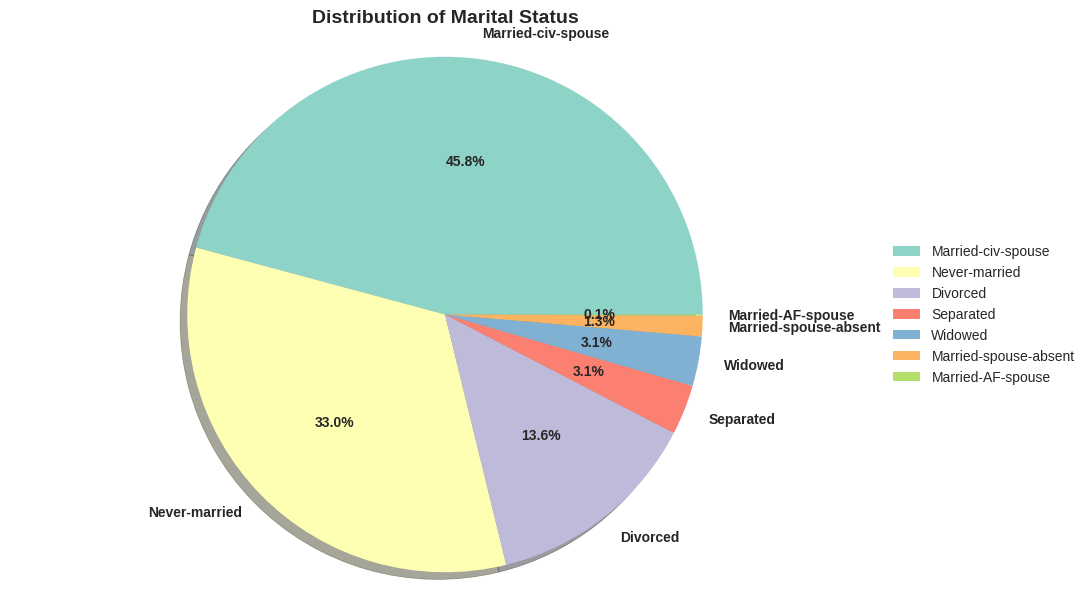

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the counts of each unique value in 'marital-status'
marital_status = df['marital-status'].value_counts()

# Set a professional style
plt.style.use('seaborn-whitegrid')

# Create a pie chart
plt.figure(figsize=(10, 7))
colors = plt.cm.Set3.colors
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 10, 'weight': 'bold'})

# Adding a title
plt.title('Distribution of Marital Status', fontsize=14, weight='bold')

# Adjusting legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


**Data cleaning and preprocessing**

In [17]:
# Number of missing values in each column of training data
missing_val = (df == '?').sum()

# Replace '?' with NaN (Not a Number)
df.replace('?', np.nan, inplace=True)

print("Missing values in data :")
print(missing_val[missing_val > 0])

Missing values in data :
workclass         2799
occupation        2809
native-country     857
dtype: int64


In [18]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print column information
print("Numerical Columns:")
print(", ".join(numerical_cols))

print("\nCategorical Columns:")
print(", ".join(categorical_cols))


Numerical Columns:
age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week

Categorical Columns:
workclass, education, marital-status, occupation, relationship, race, gender, native-country, income


In [19]:
from sklearn.impute import SimpleImputer

# Imputer for numerical data (fill missing values with median)
numerical_imputer = SimpleImputer(strategy='median')

# Imputer for categorical data (fill missing values with most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Display the updated DataFrame
print(df)


        age     workclass    fnlwgt     education  educational-num  \
0      25.0       Private  226802.0          11th              7.0   
1      38.0       Private   89814.0       HS-grad              9.0   
2      28.0     Local-gov  336951.0    Assoc-acdm             12.0   
3      44.0       Private  160323.0  Some-college             10.0   
4      18.0       Private  103497.0  Some-college             10.0   
...     ...           ...       ...           ...              ...   
48837  27.0       Private  257302.0    Assoc-acdm             12.0   
48838  40.0       Private  154374.0       HS-grad              9.0   
48839  58.0       Private  151910.0       HS-grad              9.0   
48840  22.0       Private  201490.0       HS-grad              9.0   
48841  52.0  Self-emp-inc  287927.0       HS-grad              9.0   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      

In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values, if any
print("Missing values in the dataset:")
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print(missing_values[missing_values > 0])


Missing values in the dataset:
No missing values found.


In [21]:
# Show unique values and their counts in categorical columns
for column in categorical_cols:
    unique_values_count = df[column].value_counts()
    print(f"Unique values in '{column}':")
    for value, count in unique_values_count.items():
        print(f"  {value}: {count} occurrences")
    print()


Unique values in 'workclass':
  Private: 36705 occurrences
  Self-emp-not-inc: 3862 occurrences
  Local-gov: 3136 occurrences
  State-gov: 1981 occurrences
  Self-emp-inc: 1695 occurrences
  Federal-gov: 1432 occurrences
  Without-pay: 21 occurrences
  Never-worked: 10 occurrences

Unique values in 'education':
  HS-grad: 15784 occurrences
  Some-college: 10878 occurrences
  Bachelors: 8025 occurrences
  Masters: 2657 occurrences
  Assoc-voc: 2061 occurrences
  11th: 1812 occurrences
  Assoc-acdm: 1601 occurrences
  10th: 1389 occurrences
  7th-8th: 955 occurrences
  Prof-school: 834 occurrences
  9th: 756 occurrences
  12th: 657 occurrences
  Doctorate: 594 occurrences
  5th-6th: 509 occurrences
  1st-4th: 247 occurrences
  Preschool: 83 occurrences

Unique values in 'marital-status':
  Married-civ-spouse: 22379 occurrences
  Never-married: 16117 occurrences
  Divorced: 6633 occurrences
  Separated: 1530 occurrences
  Widowed: 1518 occurrences
  Married-spouse-absent: 628 occurrences


In [22]:
# Define mapping dictionaries
education_order = {'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4,
                   '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8, 'Some-college': 9,
                   'Assoc-voc': 10, 'Assoc-acdm': 11, 'Prof-school': 12, 'Bachelors': 13,
                   'Masters': 14, 'Doctorate': 15}

workclass_order = {'Never-worked': 0, 'Without-pay': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3,
                   'Private': 4, 'Local-gov': 5, 'State-gov': 6, 'Federal-gov': 7}

marital_status_order = {'Never-married': 0, 'Married-spouse-absent': 1, 'Separated': 2,
                        'Divorced': 3, 'Widowed': 4, 'Married-civ-spouse': 5, 'Married-AF-spouse': 6}

occupation_order = {'Priv-house-serv': 0, 'Other-service': 1, 'Handlers-cleaners': 2, 'Farming-fishing': 3,
                    'Machine-op-inspct': 4, 'Transport-moving': 5, 'Craft-repair': 6, 'Adm-clerical': 7,
                    'Sales': 8, 'Tech-support': 9, 'Protective-serv': 10, 'Prof-specialty': 11,
                    'Exec-managerial': 12, 'Armed-Forces': 13}

relationship_order = {'Own-child': 0, 'Other-relative': 1, 'Not-in-family': 2,
                      'Unmarried': 3, 'Wife': 4, 'Husband': 5}

income_order = {'<=50K': 0, '>50K': 1}

# Replace categorical values with numerical values
df['education'] = df['education'].replace(education_order)
df['relationship'] = df['relationship'].replace(relationship_order)
df['occupation'] = df['occupation'].replace(occupation_order)
df['marital-status'] = df['marital-status'].replace(marital_status_order)
df['workclass'] = df['workclass'].replace(workclass_order)
df['income'] = df['income'].replace(income_order)


In [23]:
# Define arbitrary country groups for demonstration purposes
country_group = {
    # Group 1: High-income economies with global influence
    'United-States': 1, 'Canada': 1, 'England': 1, 'Germany': 1, 'Ireland': 1,
    'France': 1, 'Holand-Netherlands': 1, 'Italy': 1, 'Scotland': 1,

    # Group 2: Emerging economies with significant growth and middle-income status
    'Philippines': 2, 'India': 2, 'China': 2, 'Taiwan': 2, 'Japan': 2,
    'South': 2, 'Iran': 2, 'Hong': 2,

    # Group 3: Developing countries with varying levels of development
    'Mexico': 3, 'Puerto-Rico': 3, 'El-Salvador': 3, 'Cuba': 3, 'Jamaica': 3,
    'Dominican-Republic': 3, 'Guatemala': 3, 'Columbia': 3, 'Haiti': 3,
    'Nicaragua': 3, 'Peru': 3, 'Ecuador': 3, 'Trinadad&Tobago': 3,

    # Group 4: Countries with less industrialization and others not fitting into the other categories
    'Vietnam': 4, 'Thailand': 4, 'Cambodia': 4, 'Laos': 4, 'Yugoslavia': 4,
    'Poland': 4, 'Hungary': 4, 'Portugal': 4, 'Greece': 4,
    'Outlying-US(Guam-USVI-etc)': 4, 'Honduras': 4
}

# Replace 'native-country' values with group labels
df['native-country'] = df['native-country'].replace(country_group)

In [24]:
import pandas as pd

# Apply one-hot encoding for categorical values 'race' and 'gender'
race_dummies = pd.get_dummies(df['race'], prefix='race')
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')

# Join the new one-hot encoded columns back to the original DataFrame
df = pd.concat([df, race_dummies, gender_dummies], axis=1)

# Drop the original 'race' and 'gender' columns
df.drop(['race', 'gender'], axis=1, inplace=True)


In [25]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25.0,4,226802.0,6,7.0,0,4,0,0.0,0.0,40.0,1,0,0,0,1,0,0,0,1
1,38.0,4,89814.0,8,9.0,5,3,5,0.0,0.0,50.0,1,0,0,0,0,0,1,0,1
2,28.0,5,336951.0,11,12.0,5,10,5,0.0,0.0,40.0,1,1,0,0,0,0,1,0,1
3,44.0,4,160323.0,9,10.0,5,4,5,7688.0,0.0,40.0,1,1,0,0,1,0,0,0,1
4,18.0,4,103497.0,9,10.0,0,11,0,0.0,0.0,30.0,1,0,0,0,0,0,1,1,0


In [26]:
df.shape

(48842, 20)

In [27]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male'],
      dtype='object')

**Exploratory Data Analysis (EDA)**

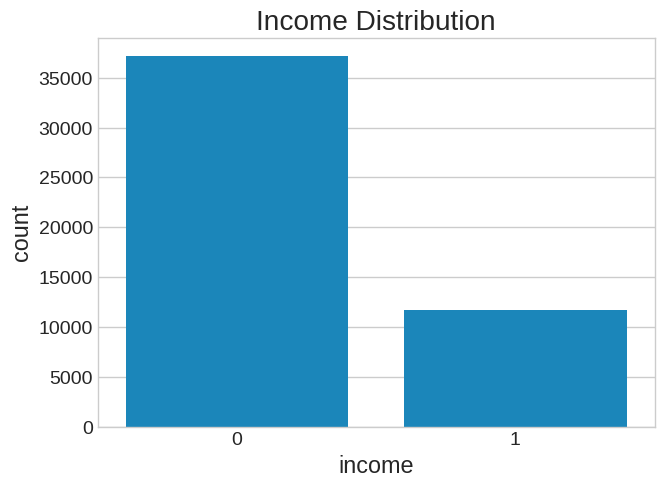

In [28]:
# Distribution of the 'income' column
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

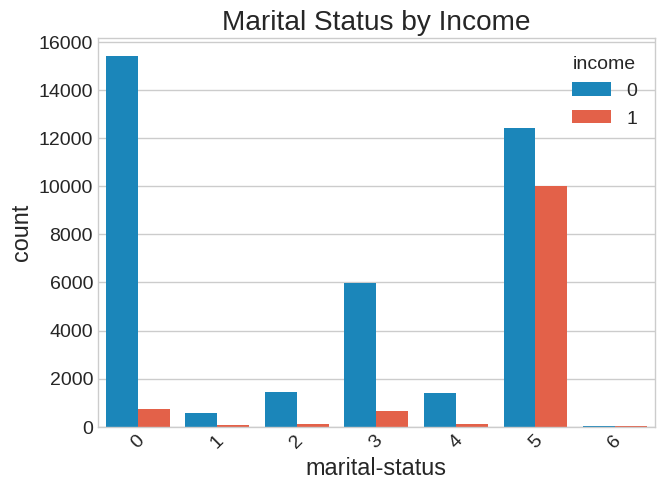

In [29]:
# Count plots for 'marital-status' and 'income'
sns.countplot(x='marital-status', hue='income', data=df)
plt.title('Marital Status by Income')
plt.xticks(rotation=45)
plt.show()


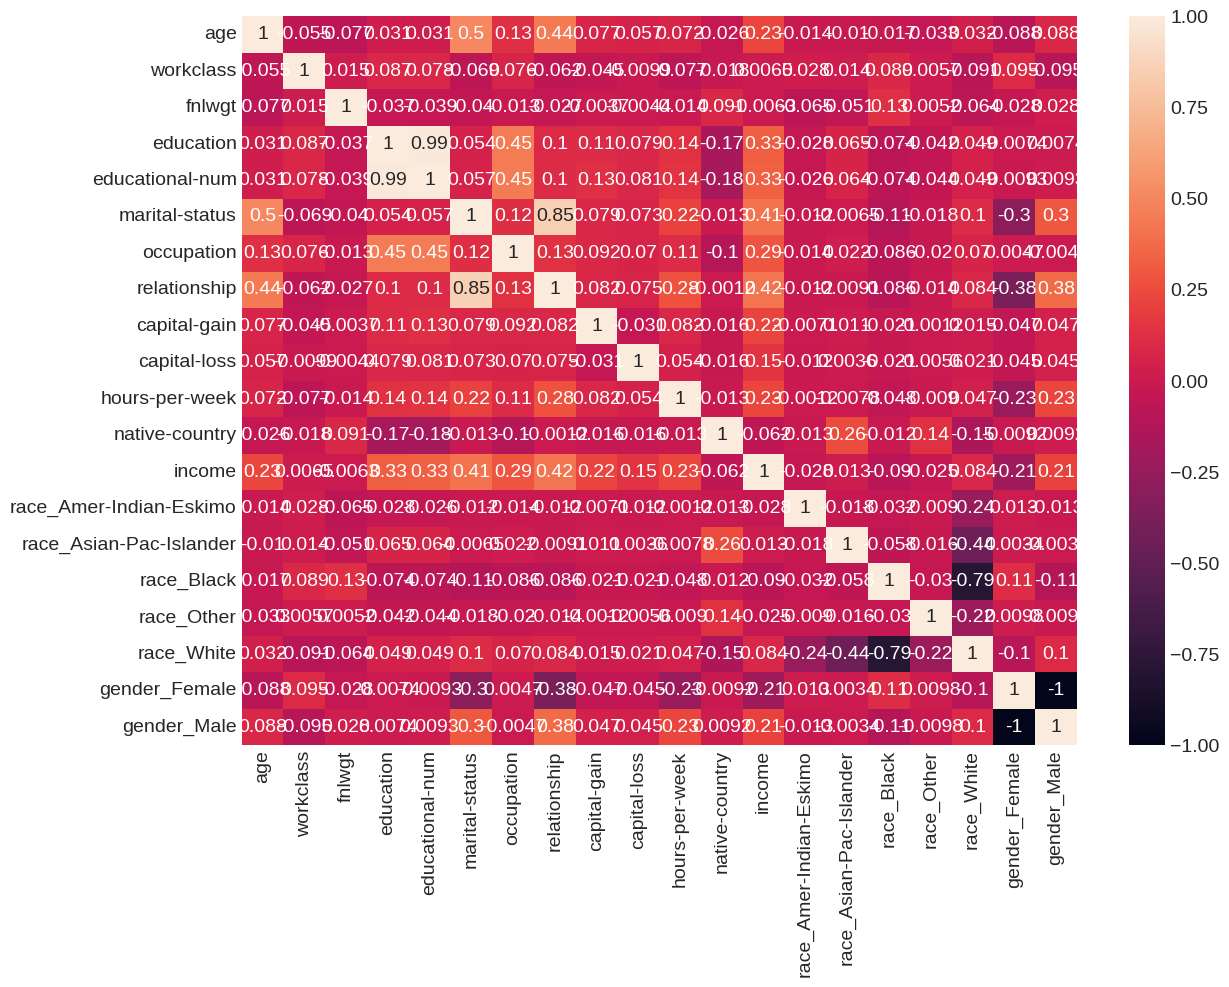

In [30]:
# Correlation matrix heatmap
df_corr = df.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

**Training the model**

In [31]:
# Define features and target
X = df.drop('income', axis=1)
y = df['income']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

in scikit-learn. n_estimators represents the number of trees in the random forest.

A random forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. The n_estimators parameter allows you to specify how many trees should be built in the forest.

Setting n_estimators=100 means that your random forest classifier will consist of 100 decision trees. The idea behind having multiple trees is to improve the overall predictive performance and reduce overfitting. In practice, the optimal value for n_estimators can depend on the specific dataset and problem you are working on. It's often chosen through experimentation or using techniques like cross-validation.



**Testing the model**

In [32]:
from sklearn.metrics import accuracy_score, mean_absolute_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and display Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Accuracy: 0.86
Mean Absolute Error (MAE): 0.14


In [33]:
model.score(X_test,y_test)

0.8628314054662709

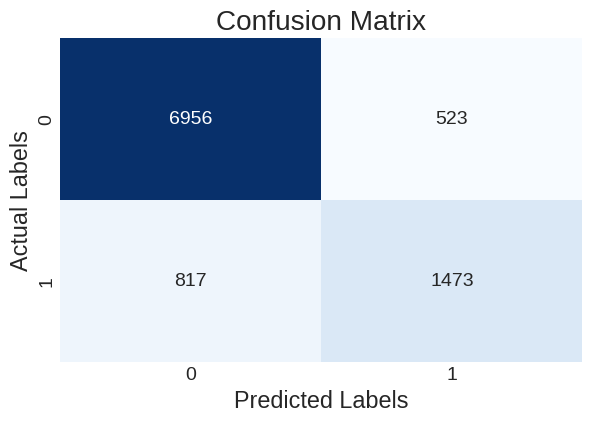

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


**Predicting income**

In [35]:
# Define the feature values for a person : [35, 'Private', 200000, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 5000, 0, 45, 'United-States', 0, 0, 0, 0, 1, 0, 1]
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                 'marital-status', 'occupation', 'relationship', 'capital-gain',
                 'capital-loss', 'hours-per-week', 'native-country',
                 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
                 'race_Other', 'race_White', 'gender_Female', 'gender_Male']

person = [35, 0, 200000, 13, 13, 5,
                   12, 5, 5000, 0, 45, 1,
                   0, 0, 0, 0, 1, 0, 1]

df_person = pd.DataFrame([person], columns=feature_names)

# Predict income
pred = model.predict(df_person)

# Display result
if pred:
    income = "<=50K"
else:
    income = ">50K"

print("Estimated income :",income)

Estimated income : >50K
